In [1]:
from IPython.display import Image
from IPython.display import HTML, display
from PIL import Image, ImageFilter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.graphics.mosaicplot import mosaic
import warnings 
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv1D, MaxPooling1D
from keras.layers import Dense, Activation, Dropout, Flatten
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:

trainpt = pd.read_csv("train.csv")

In [2]:
trainpt.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

creamos una nueva columna llamada Powcat en el DataFrame trainpt basada en la distribución de valores de la columna Pawpularity. Se utiliza la función pd.cut para clasificar los valores de Pawpularity en intervalos específicos (bins) y asignarles etiquetas (labels). Esto ayuda a dividir los valores de Pawpularity en categorías discretas.

In [3]:
# Cut Level for Powpularity
powcat=pd.cut(trainpt.Pawpularity, bins=[0,40,60,85,100], 
             labels=["D", "C" ,"B", "A"])
trainpt.insert(14,"Powcat", powcat)


<Axes: xlabel='count', ylabel='Powcat'>

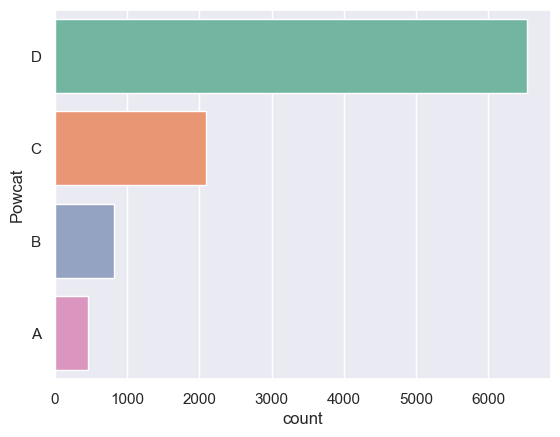

In [4]:

sns.set()
sns.countplot(trainpt["Powcat"],palette="Set2")

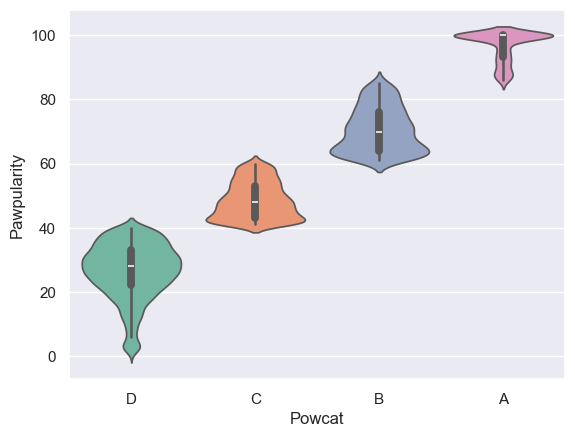

In [5]:
fig=plt.figure()
ax=sns.violinplot(x="Powcat" , y="Pawpularity",palette="Set2", data=trainpt)
plt.show()

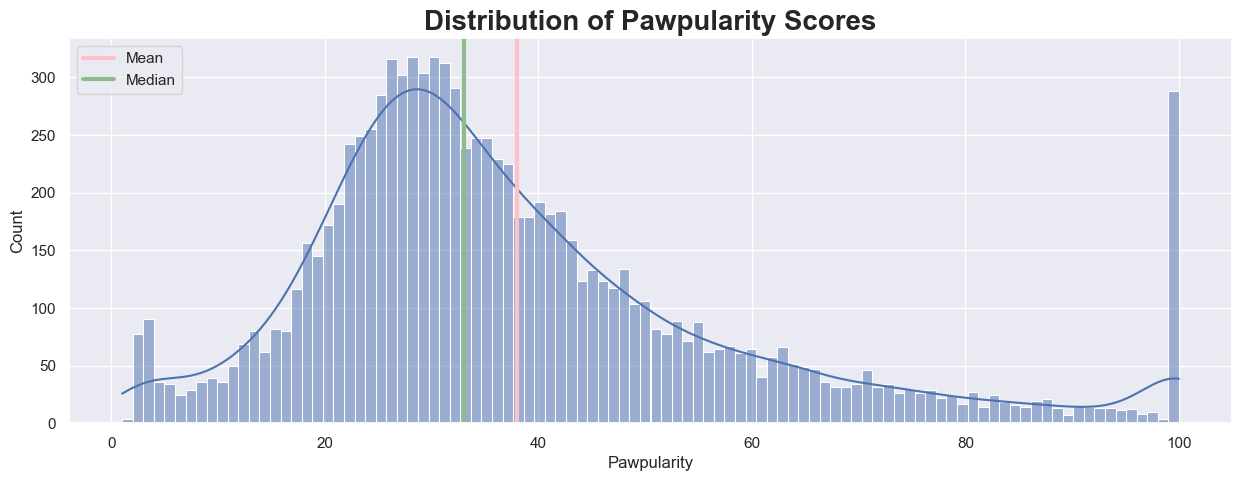

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
fig=plt.figure()
sns.histplot(data=trainpt, x="Pawpularity",kde=True, bins=100)
plt.axvline(trainpt["Pawpularity"].mean(),c="pink",ls="-", lw=3, label="Mean")
plt.axvline(trainpt["Pawpularity"].median(),c="darkseagreen",ls="-",lw=3,label="Median")
plt.title("Distribution of Pawpularity Scores", fontsize=20,fontweight="bold")
plt.legend()
plt.show()

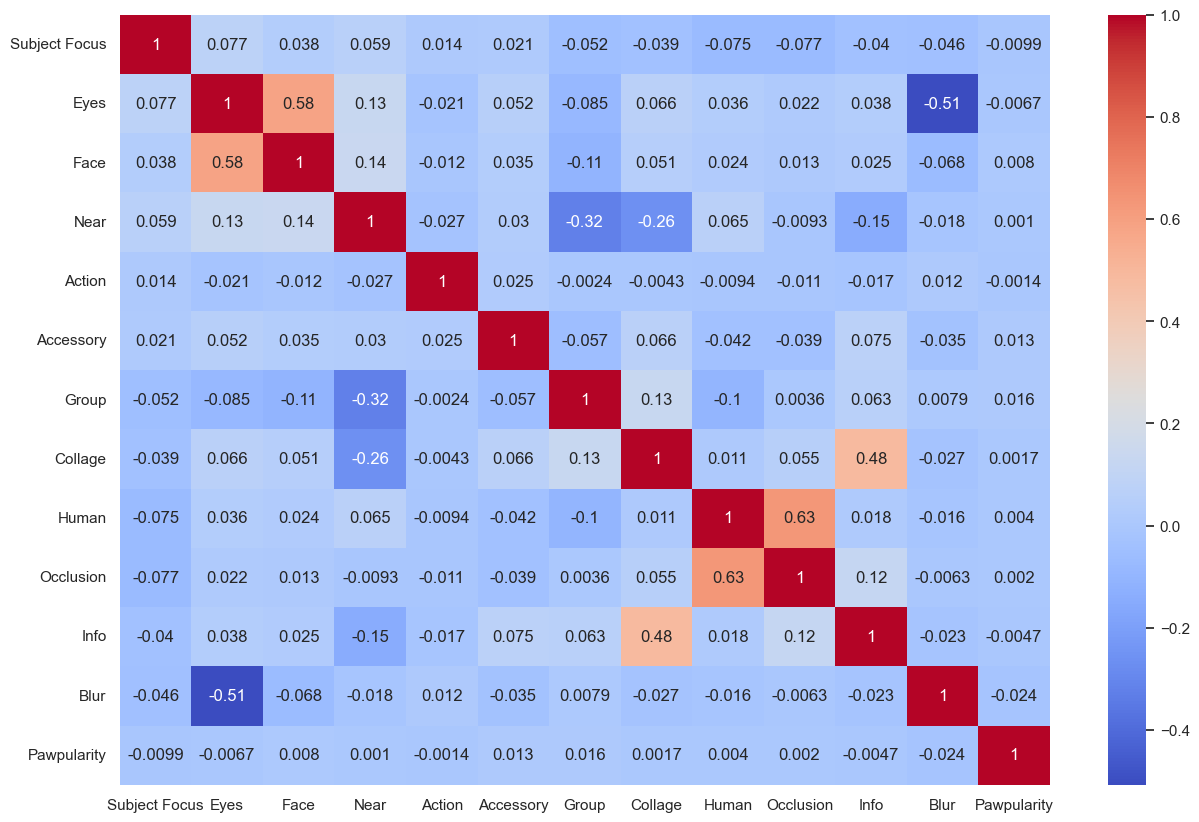

In [7]:
# Eliminar columnas no numéricas ('Id' y 'Powcat')
numeric_trainpt = trainpt.drop(["Id", "Powcat"], axis=1)
pet_ft=trainpt.drop(["Id","Pawpularity","Powcat"], axis=1)
# Crear el heatmap de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_trainpt.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train_jpg = glob("train/*.jpg")
test_jpg = glob("test/*.jpg")

Cargamos las imagenes, con su respectivo ID

In [9]:
id_modified=train_jpg[0].split('\\')[-1].split('.')[0]
train_df = train.loc[train['Id'] == id_modified]
train_df

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63

Creamos una serie de los valores de Pawpularity

In [10]:
id_modified1 = train.loc[train['Id'] == id_modified,'Pawpularity']
pawpularity= id_modified1.iloc[0]
pawpularity


np.int64(63)

In [11]:
print(id_modified)
print(train['Id'].unique())


0007de18844b0dbbb5e1f607da0606e0
['0007de18844b0dbbb5e1f607da0606e0' '0009c66b9439883ba2750fb825e1d7db'
 '0013fd999caf9a3efe1352ca1b0d937e' ... 'ffdf2e8673a1da6fb80342fa3b119a20'
 'fff19e2ce11718548fa1c5d039a5192a' 'fff8e47c766799c9e12f3cb3d66ad228']


bucle para mostrar imágenes y su valor de Pawpularity. Aquí están los pasos detallados:

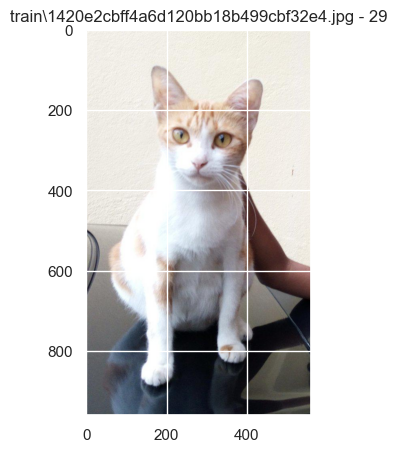

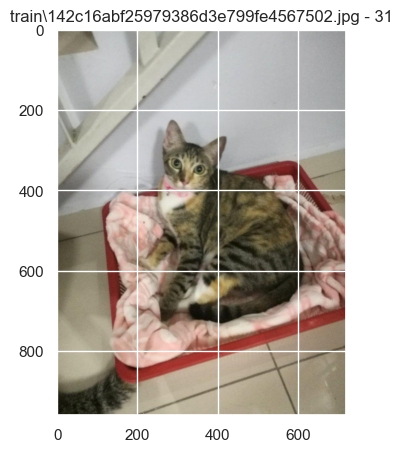

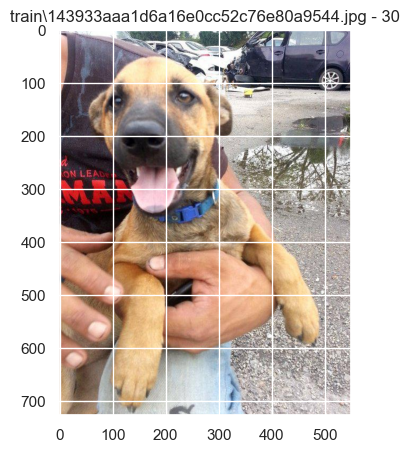

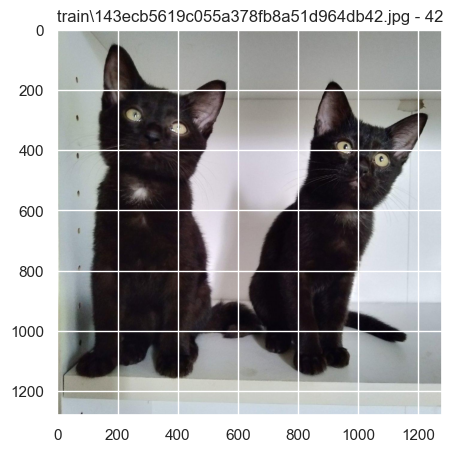

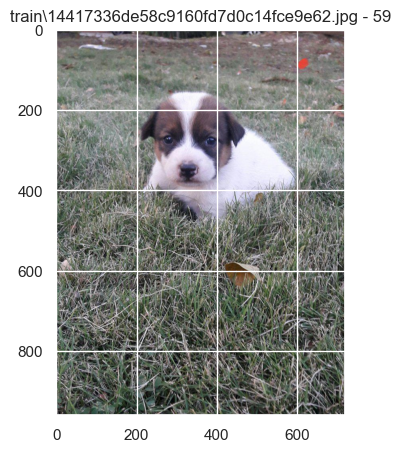

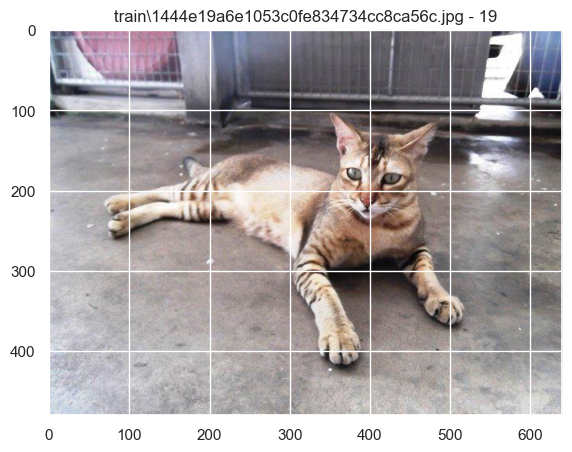

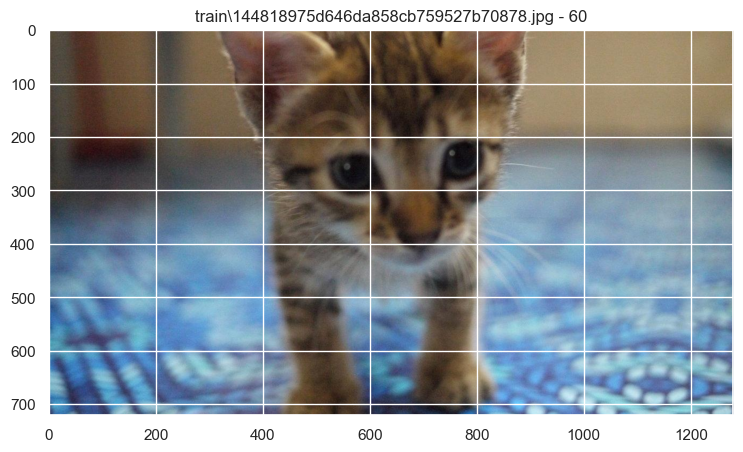

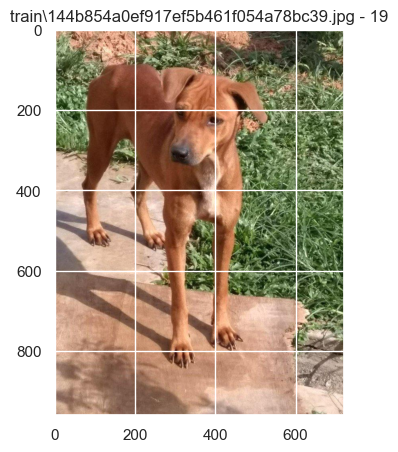

In [12]:

for i in range(800, 808):
    # Extrae solo el nombre del archivo sin la extensión ni la ruta
    id_modified = Path(train_jpg[i]).stem
    
    # Busca el valor de 'Pawpularity' en el DataFrame
    id_modified_series = train.loc[train['Id'] == id_modified, 'Pawpularity']
    
    # Verifica si se encontró el ID antes de acceder a iloc[0]
    if not id_modified_series.empty:
        pawpularity = id_modified_series.iloc[0]
        image = plt.imread(train_jpg[i])
        plt.imshow(image)
        title = f"{train_jpg[i]} - {pawpularity}"
        plt.title(title)
        plt.show()
    else:
        print(f"Id {id_modified} no encontrado en el DataFrame.")


Esta función permite visualizar imágenes con un valor específico de Pawpularity de la base de datos, mostrando un total de 5 imágenes al mismo tiempo.

In [13]:
def image_2_c_pawpularity(desired_pawpularity):
    showing_image_numbers=5
    sample=train[train["Pawpularity"] == desired_pawpularity].sample(5).reset_index(drop=True)
    for i in range(5):
        id_modified = sample.iloc[i]['Id']
        root = 'train/'
        extension = '.jpg'
        image_path = root + str(id_modified) + extension
        pawpularity=sample.iloc[i]['Pawpularity']
        image= plt.imread(image_path)
        plt.subplot(1, 5, i+1)
        title = pawpularity
        plt.title(title) 
        plt.imshow(image)
    plt.show()

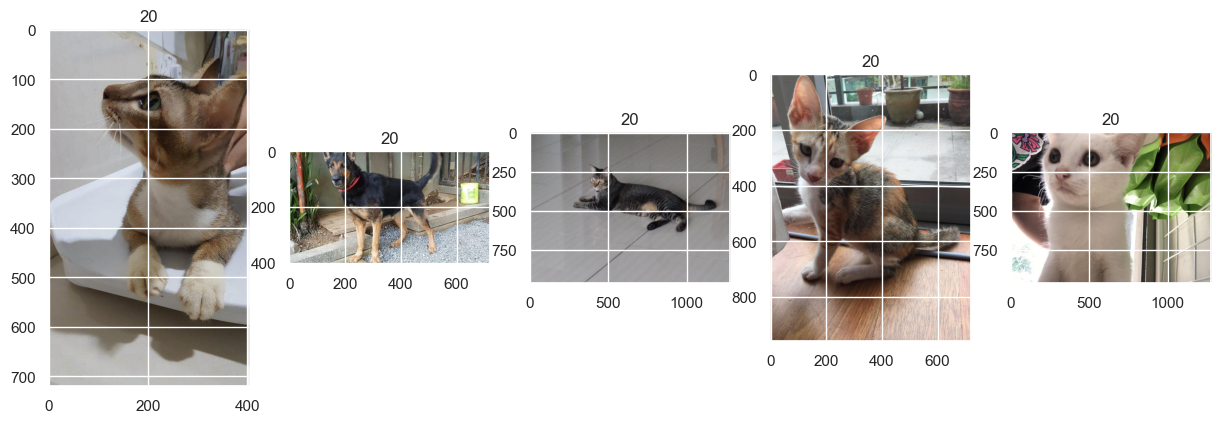

In [14]:
image_2_c_pawpularity(20)

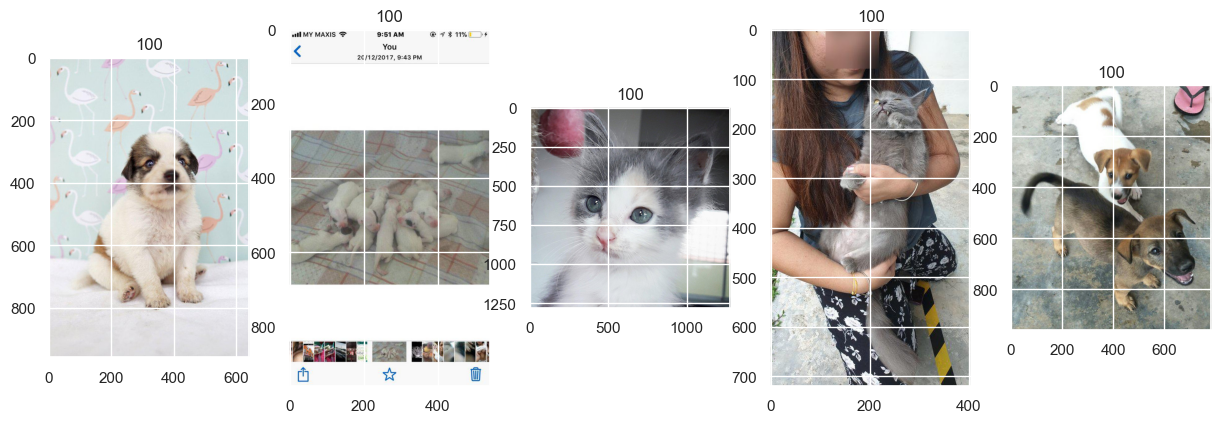

In [15]:
image_2_c_pawpularity(100)

función, fplot, crea un gráfico compuesto de tres subgráficos (violinplot, histplot y countplot) para analizar la relación entre una variable categórica y el valor de Pawpularity o la categoría Powcat.

In [16]:
def fplot(var,label):
    fig, ax=plt.subplots(1,3)
    sns.violinplot(x=var, y="Pawpularity",data=trainpt,palette="Set2",ax=ax[0])
    sns.histplot(trainpt,x="Pawpularity", hue=var, palette="Set2",kde=True,ax=ax[1])
    sns.countplot(x=var,hue="Powcat",data=trainpt,palette="Set2", ax=ax[2])
    plt.suptitle(label)
    return plt
fig.show()  

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

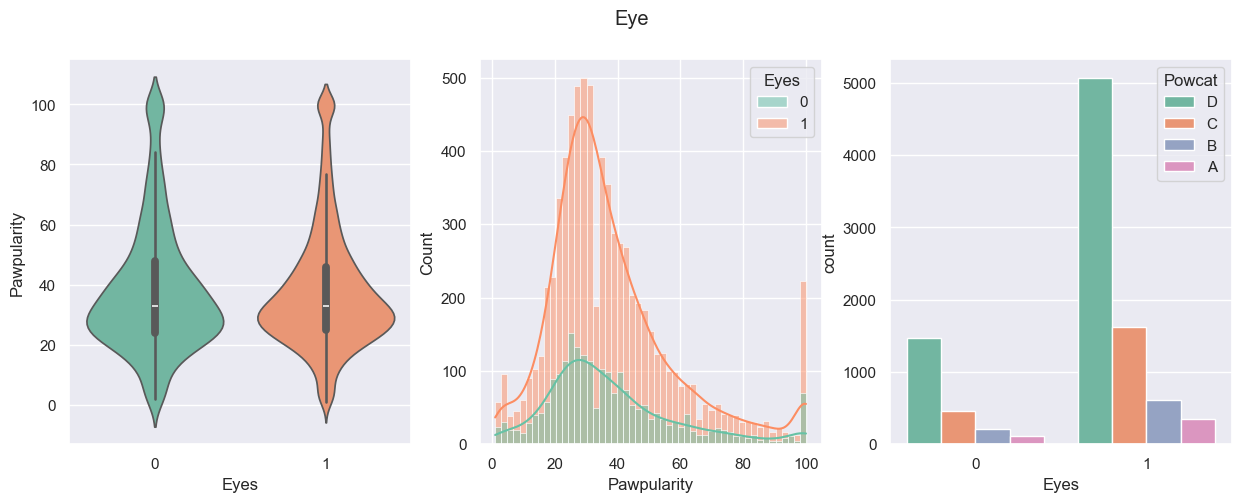

In [17]:
fplot("Eyes", "Eye")
# La variable Eyes parece tener un impacto en Pawpularity. 
# Las imágenes con Eyes = 1 tienden a tener una distribución
# más amplia y están más asociadas a valores altos de Pawpularity.

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

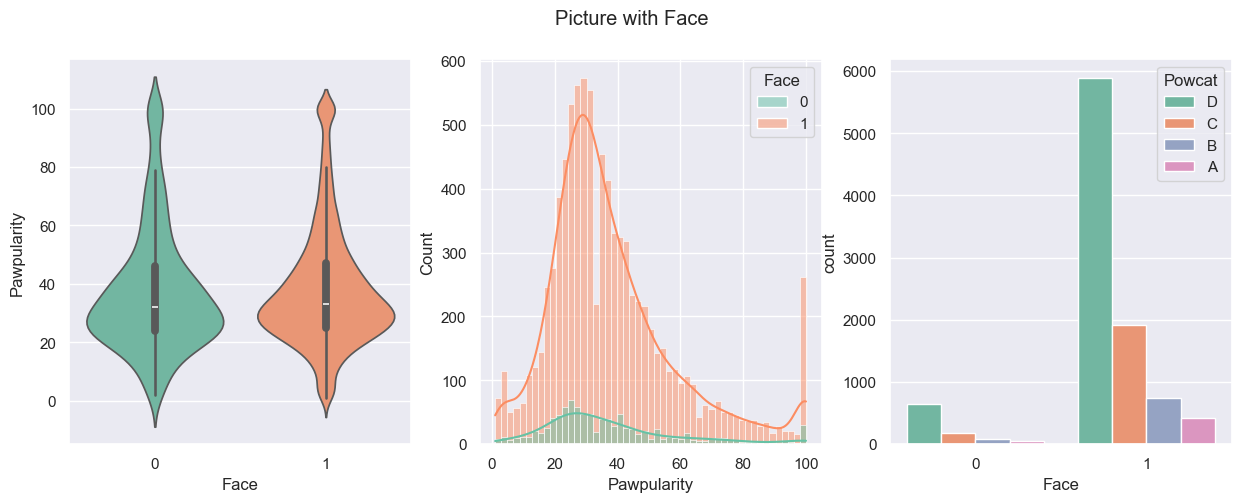

In [18]:
fplot("Face", "Picture with Face")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

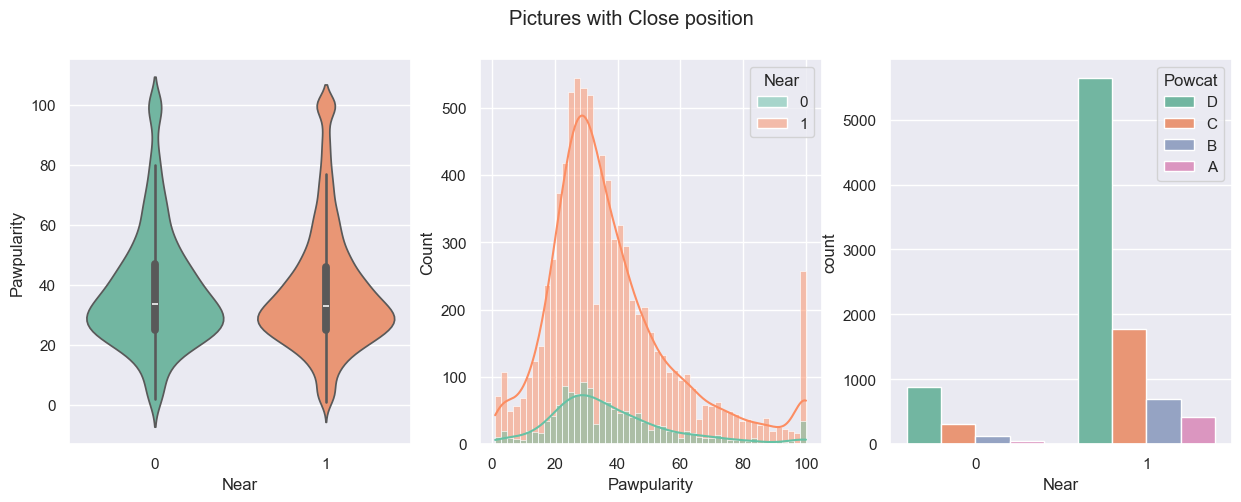

In [19]:
fplot("Near", "Pictures with Close position")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

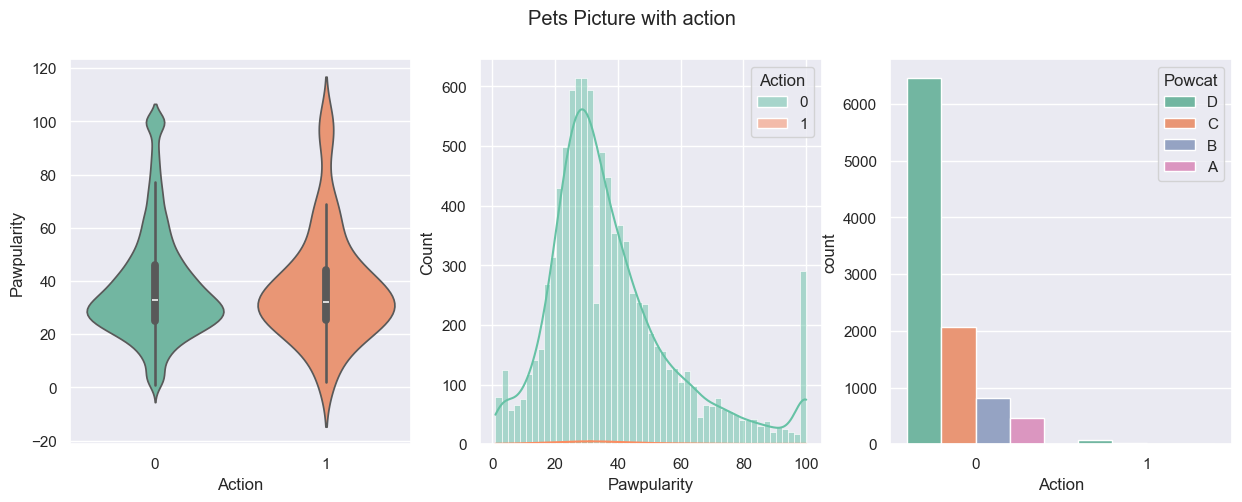

In [20]:
fplot("Action", "Pets Picture with action")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

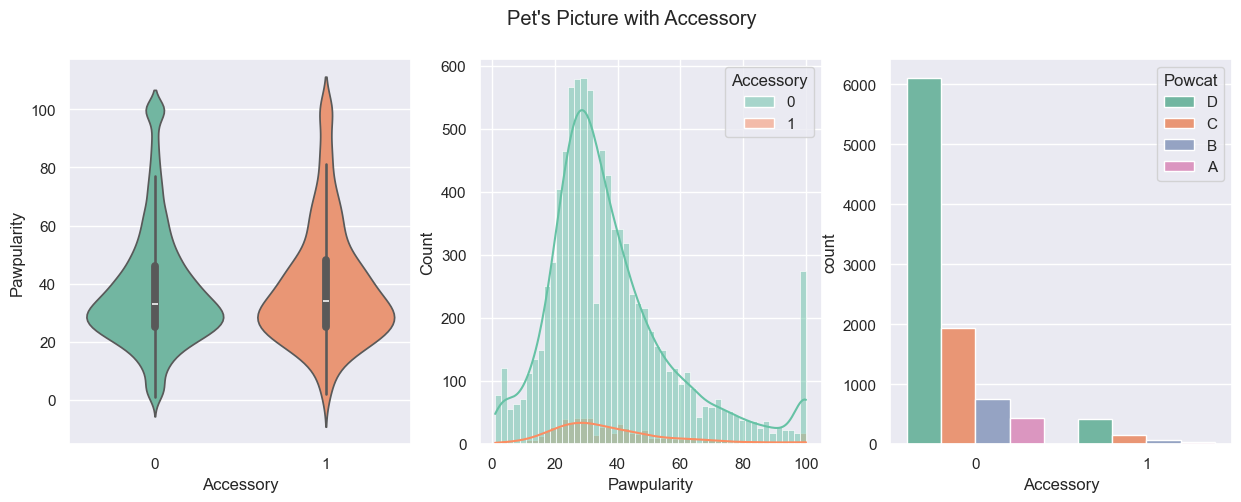

In [21]:
fplot("Accessory", "Pet's Picture with Accessory")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

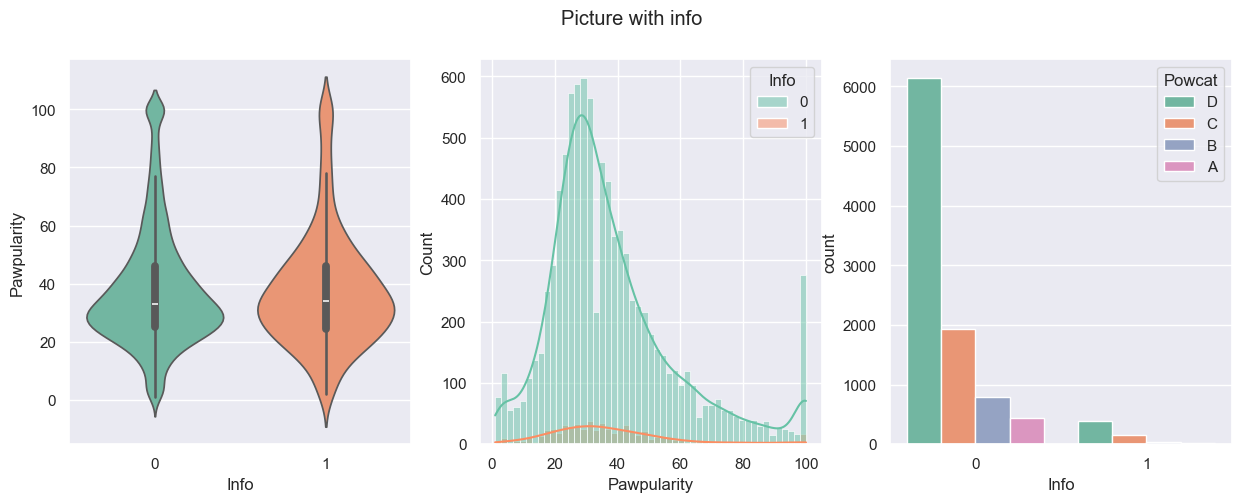

In [22]:
fplot("Info", "Picture with info")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

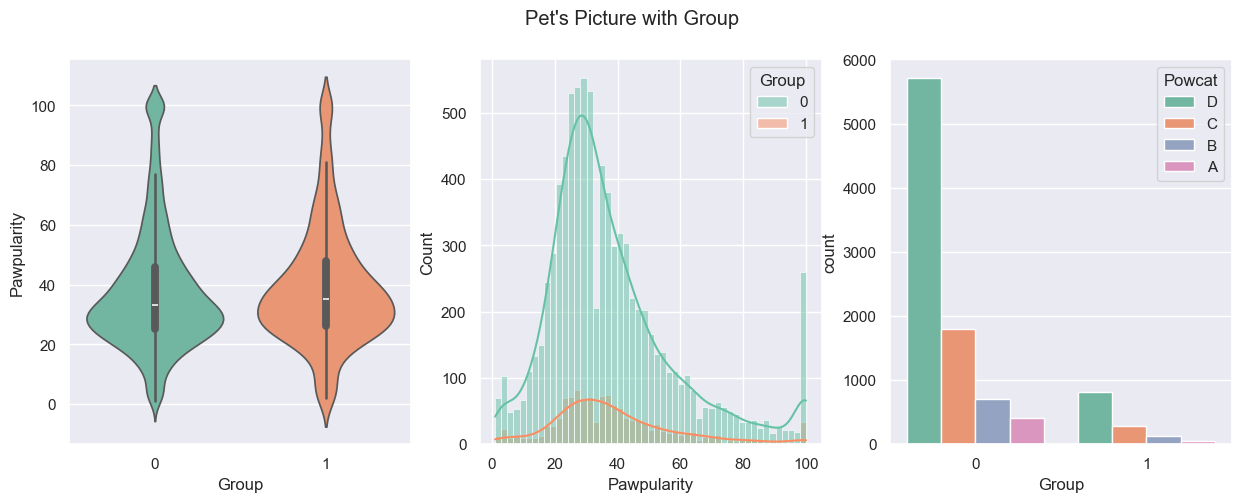

In [23]:
fplot("Group", "Pet's Picture with Group")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

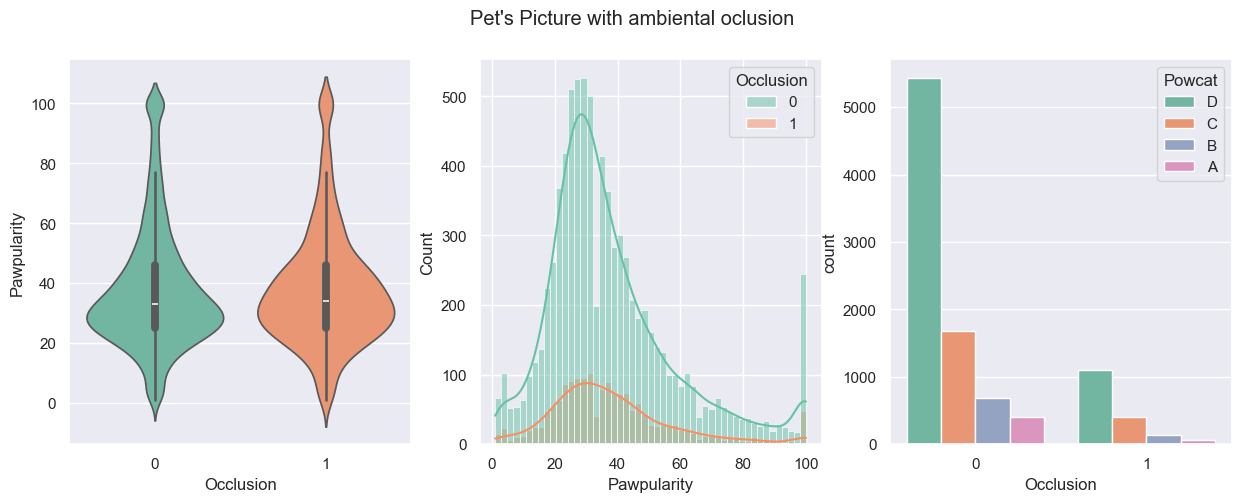

In [24]:
fplot("Occlusion", "Pet's Picture with ambiental oclusion") 

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

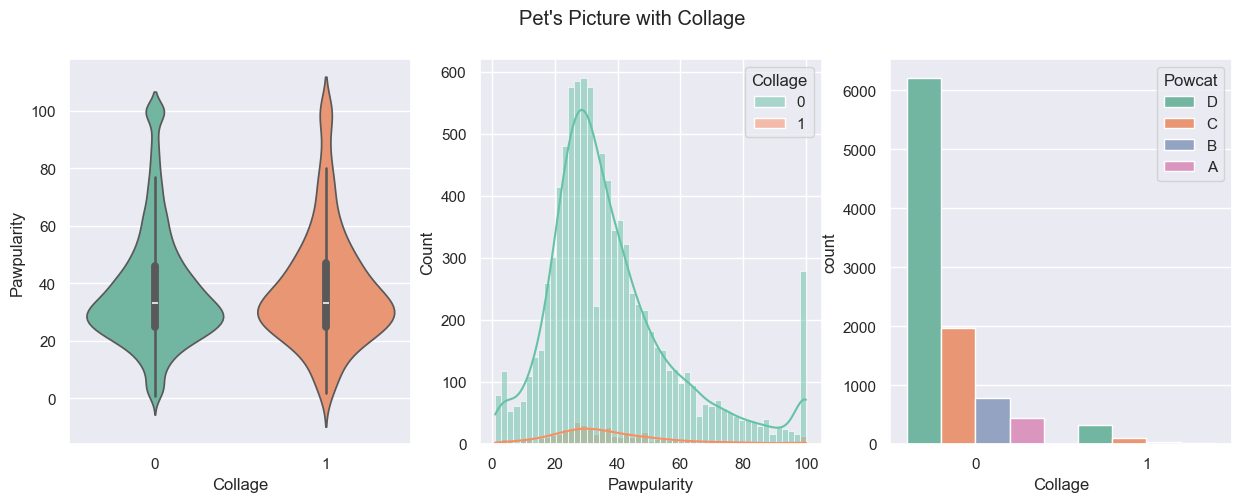

In [25]:
fplot("Collage", "Pet's Picture with Collage")

<module 'matplotlib.pyplot' from 'c:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

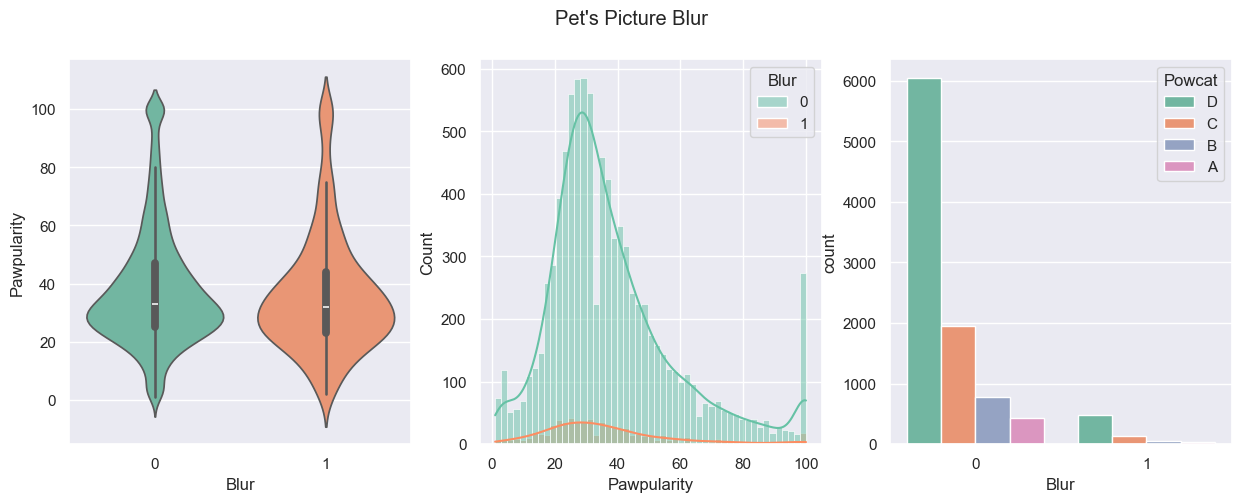

In [26]:
fplot("Blur", "Pet's Picture Blur")